In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np

In [27]:
data = pd.read_csv('./sarah_cleaned_output.csv')

# filter data
# columns_to_include = ['restaurant', 'calories', 'total_fat', 'cholesterol', 'sodium', 'carbohydrates', 'dietary_fiber','sugar', 'protein']
# data = data[columns_to_include]
data = data.dropna()
# data.to_csv('output.csv', index=False)

# have to reset the index after dropping the null rows or else next cell will error
data = data.reset_index(drop=True)
print(data)

       restaurant  calories  total_fat  cholesterol  sodium  carbohydrates  \
0      Applebee's     370.0       22.0         55.0  1250.0           26.0   
1      Applebee's     220.0       12.0         25.0  1270.0           22.0   
2      Applebee's     280.0       15.0         35.0   930.0           26.0   
3      Applebee's     130.0        7.0         10.0   230.0           14.0   
4      Applebee's    1560.0      103.0         65.0  1610.0          120.0   
...           ...       ...        ...          ...     ...            ...   
23704     Zaxby's     890.0       60.0        360.0  2910.0            9.0   
23705     Zaxby's    1150.0       62.0        315.0  6540.0           48.0   
23706     Zaxby's     680.0       33.0        100.0  2570.0           49.0   
23707     Zaxby's     780.0       45.0        115.0  3180.0           47.0   
23708     Zaxby's     160.0        0.0          0.0   150.0           40.0   

       dietary_fiber  sugar  protein  
0                2.0    

In [28]:
def clean_monetary_value(data):
    if isinstance(data, str):
        cleaned_data = data.replace('$', '').strip()
        cleaned_data = clean_string_with_comma(cleaned_data)
        return float(cleaned_data)
    return data
    
def clean_string_with_comma(data):
    if isinstance(data, str):
        cleaned_data = data.replace(',', '')
        return float(cleaned_data)
    return data

def clean_percentage(data):
    if isinstance(data, str):
        return float(data.strip('%'))
    return data

def clean_restaurant_name(data):
    return data.replace('–', '')


In [29]:
# clean data

# data = data.apply(clean_percentage)
# data = data.apply(clean_monetary_value)
# data = data.apply(clean_string_with_comma)
# data = data.apply(clean_restaurant_name)

In [36]:
print(data.columns)

X = data.drop(columns=['restaurant'])
y = data['restaurant']
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=1 )
knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)


Index(['restaurant', 'calories', 'total_fat', 'cholesterol', 'sodium',
       'carbohydrates', 'dietary_fiber', 'sugar', 'protein'],
      dtype='object')


Accuracy: 0.19652496626180838


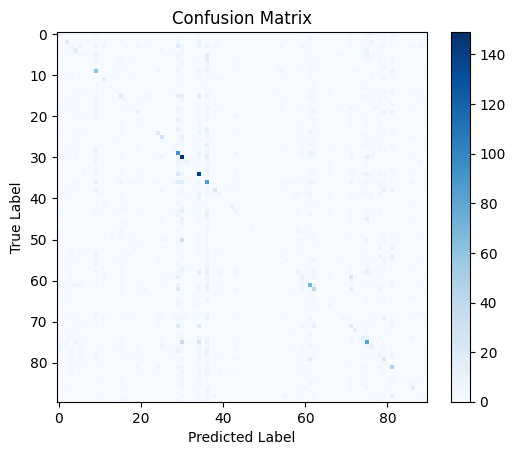

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

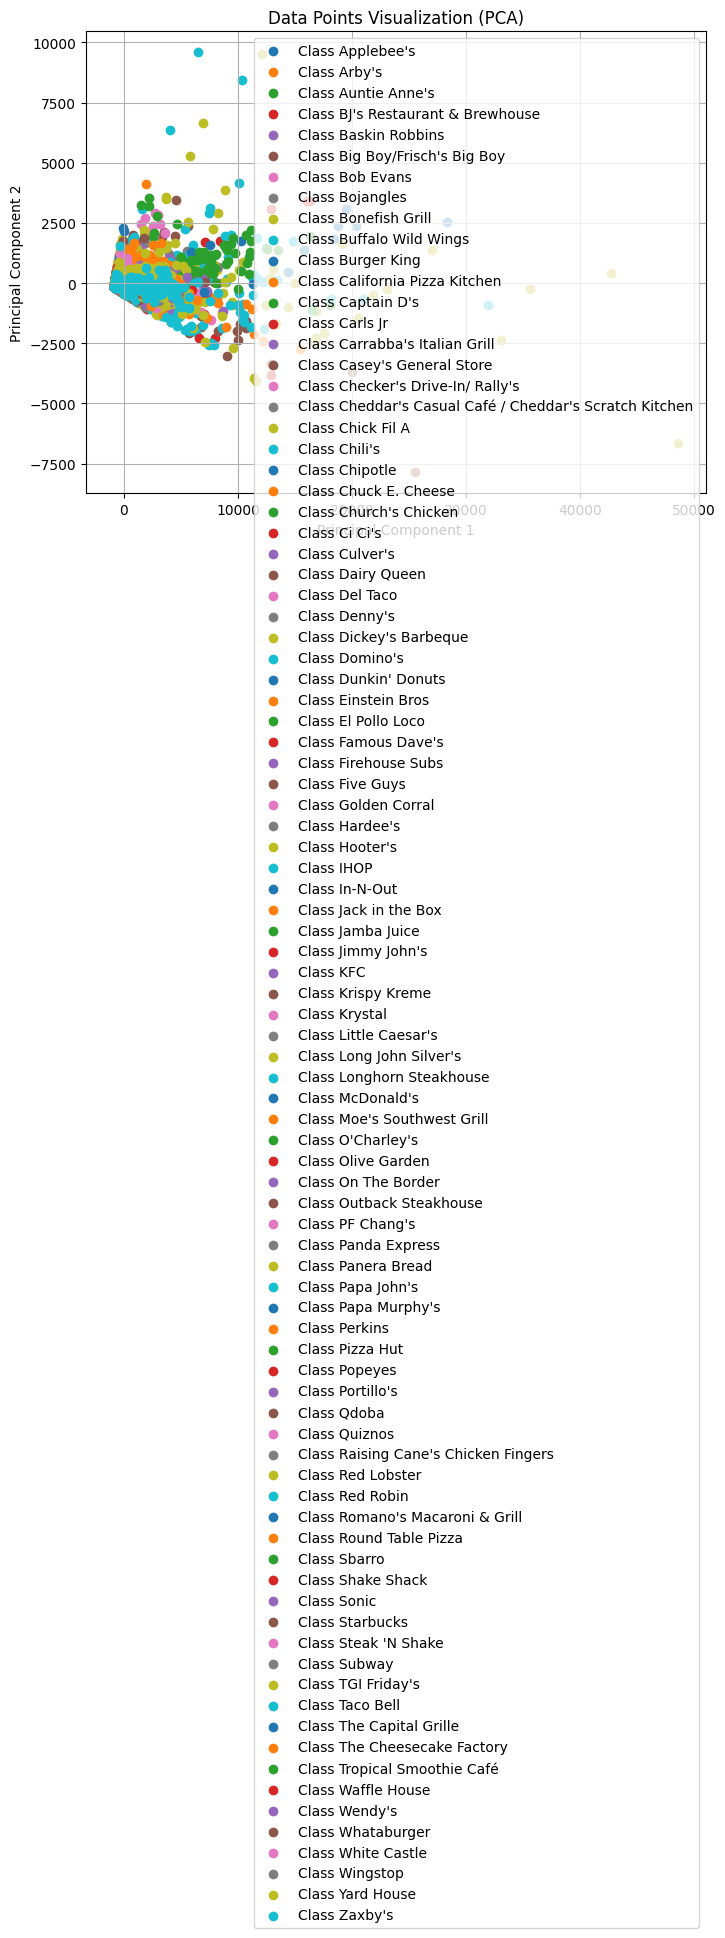

In [39]:
from sklearn.decomposition import PCA

# Perform PCA for visualization
pca = PCA(n_components=2)  # Project to 2 dimensions for visualization
X_pca = pca.fit_transform(X)

# Plotting
plt.figure(figsize=(8, 6))

# Plot each class separately
for class_label in np.unique(y):
    X_class = X_pca[y == class_label]
    plt.scatter(X_class[:, 0], X_class[:, 1], label=f'Class {class_label}')

plt.title('Data Points Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

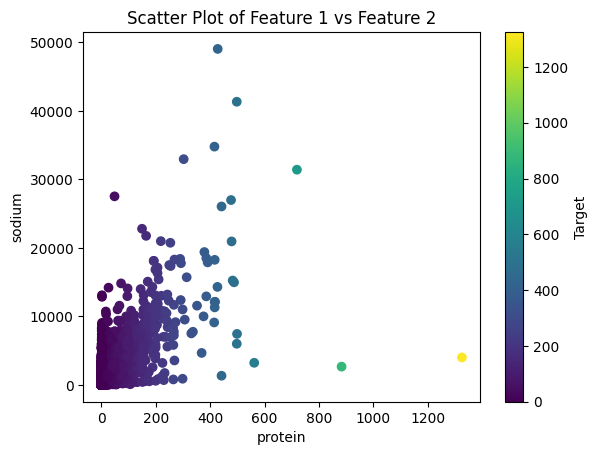

In [45]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with features 'feature1' and 'feature2'
plt.scatter(data['protein'], data['sodium'], c=data['protein'], cmap='viridis')
plt.xlabel('protein')
plt.ylabel('sodium')
plt.title('Scatter Plot of Feature 1 vs Feature 2')
plt.colorbar(label='Target')
plt.show()

ValueError: n_features must be equal to 2. Got 8 instead.

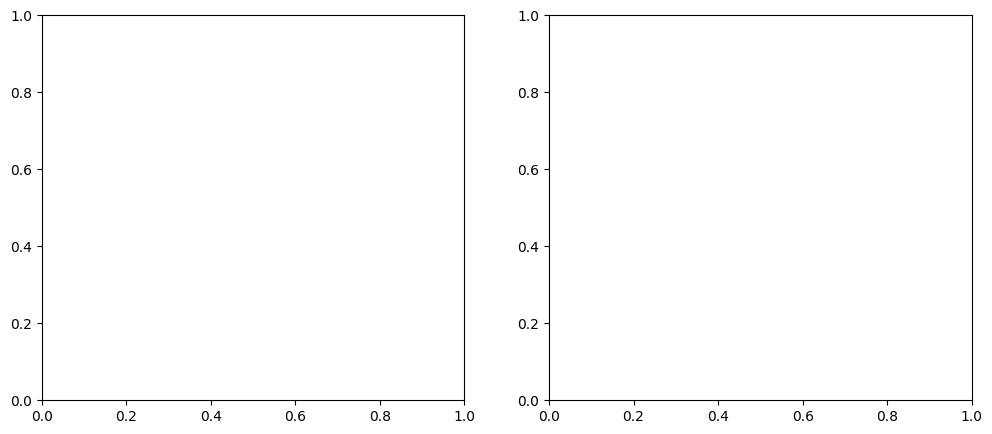

In [33]:

# visualization
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))]
)

from sklearn.inspection import DecisionBoundaryDisplay

_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(x_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        x_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel="hello",
        ylabel="yes",
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        data.target_names,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()